In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf
import sys
sys.path.append('../')
import wave_gan_resize

In [2]:
custom_objects = {
    'Resize': wave_gan_resize.Resize
}

In [3]:
generator = tf.keras.models.load_model('../models/hybrid_wpgan_pitch_0728.h5', custom_objects=custom_objects)

In [54]:
# Iterated below for saving multiple audio files
num = 0

In [79]:
noise = tf.random.normal([1, 100])
audio = generator(noise, training=False)
num += 1

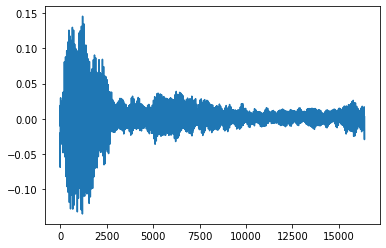

In [80]:
plt.plot(audio[0])

In [81]:
ipd.Audio(audio[0,:,0], rate=16000)

In [153]:
sf.write('./generated_audio/flute_wgan_upsample_{}.wav'.format(num), audio[0,:,0], 16000, subtype='PCM_16')

In [61]:
hybrid_audio = np.load('../data/hybrid_pitch_60.npy')
print(hybrid_audio.shape)

(2165, 16384)


In [78]:
ipd.Audio(hybrid_audio[100], rate=16000)